In [ ]:
!unzip /content/drive/MyDrive/majorproject/data-20240317T092757Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/valid/Mild_Demented/mild_875.jpg  
  inflating: data/valid/Mild_Demented/mild_867.jpg  
  inflating: data/valid/Mild_Demented/mild_385.jpg  
  inflating: data/valid/Mild_Demented/mild_364.jpg  
  inflating: data/valid/Mild_Demented/mild_45.jpg  
  inflating: data/valid/Mild_Demented/mild_835.jpg  
  inflating: data/valid/Mild_Demented/mild_294.jpg  
  inflating: data/valid/Mild_Demented/mild_103.jpg  
  inflating: data/valid/Mild_Demented/mild_23.jpg  
  inflating: data/valid/Mild_Demented/mild_15.jpg  
  inflating: data/valid/Mild_Demented/mild_688.jpg  
  inflating: data/valid/Mild_Demented/mild_524.jpg  
  inflating: data/valid/Mild_Demented/mild_441.jpg  
  inflating: data/valid/Mild_Demented/mild_599.jpg  
  inflating: data/valid/Mild_Demented/mild_504.jpg  
  inflating: data/valid/Mild_Demented/mild_888.jpg  
  inflating: data/valid/Mild_Demented/mild_890.jpg  
  inflating: data/valid/Mild_Demented/mild_676.jpg 

In [ ]:
import os
from collections import Counter
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Define the paths to your data folders
train_path = '/content/data/train'
valid_path = '/content/data/valid'
test_path = '/content/data/test'

# Define the image dimensions and batch size
img_width, img_height =224,224
batch_size = 32

# Data augmentation parameters
data_gen_args = dict(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(**data_gen_args, rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train, valid, and test data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Get the class labels and number of classes
class_labels = train_generator.class_indices
num_classes = len(class_labels)

# Print class distribution in the train, valid, and test sets
print("Train set class distribution:", Counter(train_generator.classes))
print("Valid set class distribution:", Counter(valid_generator.classes))
print("Test set class distribution:", Counter(test_generator.classes))

Found 3839 images belonging to 4 classes.
Found 2242 images belonging to 4 classes.
Found 319 images belonging to 4 classes.
Train set class distribution: Counter({2: 1920, 3: 1344, 0: 537, 1: 38})
Valid set class distribution: Counter({2: 1120, 3: 784, 0: 315, 1: 23})
Test set class distribution: Counter({2: 160, 3: 112, 0: 44, 1: 3})


In [ ]:
import tensorflow as tf

# Define input shape
IMG_SIZE=(224,224)
INPUT_SHAPE = IMG_SIZE + (3,)

# Create a Sequential model for MobileNet
mobilenet_model = tf.keras.models.Sequential()

# Add a rescaling layer to normalize pixel values
mobilenet_model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))

# MobileNet base model
mobilenet_model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(128, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(256, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(512, (1, 1), strides=(2, 2), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(512, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(512, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(512, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(512, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(1024, (1, 1), strides=(2, 2), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())
mobilenet_model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.Conv2D(1024, (1, 1), strides=(1, 1), padding='same', activation='relu'))
mobilenet_model.add(tf.keras.layers.BatchNormalization())

# Flatten the output for the fully connected layers
mobilenet_model.add(tf.keras.layers.GlobalAveragePooling2D())

# Fully connected layers
mobilenet_model.add(tf.keras.layers.Dense(1024, activation='relu'))
mobilenet_model.add(tf.keras.layers.Dense(4, activation='softmax'))

# Compile the model
mobilenet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print model summary
mobilenet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      2112      
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      2

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import os

# Define the paths to your data folders
train_path = '/content/data/train'
valid_path = '/content/data/valid'
test_path = '/content/data/test'

# Define the hyperparameters
batch_size = 16
epochs =30
learning_rate = 0.01
momentum = 0.9

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)

# Compile the model
mobilenet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train, valid, and test data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

checkpoint = ModelCheckpoint('Alzhiemer_mobilenetmodel.h5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', save_freq='epoch')
# Train the model
mobilenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Load the best model
mobilenet_model.save('Alzhiemer_mobilenetmodel.h5')

# Evaluate on the test set
test_loss, test_accuracy = mobilenet_model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Found 3839 images belonging to 4 classes.
Found 2242 images belonging to 4 classes.
Found 319 images belonging to 4 classes.
Epoch 1/30
239/239 [==============================] - ETA: 0s - loss: 0.9690 - accuracy: 0.5328
Epoch 1: val_accuracy improved from -inf to 0.49955, saving model to Alzhiemer_mobilenetmodel.h5
239/239 [==============================] - 31s 85ms/step - loss: 0.9690 - accuracy: 0.5328 - val_loss: 1.0399 - val_accuracy: 0.4996
Epoch 2/30
239/239 [==============================] - ETA: 0s - loss: 0.9009 - accuracy: 0.5674
Epoch 2: val_accuracy improved from 0.49955 to 0.50000, saving model to Alzhiemer_mobilenetmodel.h5
239/239 [==============================] - 18s 76ms/step - loss: 0.9009 - accuracy: 0.5674 - val_loss: 1.0696 - val_accuracy: 0.5000
Epoch 3/30
239/239 [==============================] - ETA: 0s - loss: 0.8796 - accuracy: 0.5718
Epoch 3: val_accuracy did not improve from 0.50000
239/239 [==============================] - 19s 79ms/step - loss: 0.8796 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-4-90ca3d8cddf0>:65: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = mobilenet_model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test loss: 0.4113
Test accuracy: 0.8980


Enter the path to the image: /content/data/test/Mild_Demented/mild_289.jpg
1/1 [==============================] - 1s 797ms/step


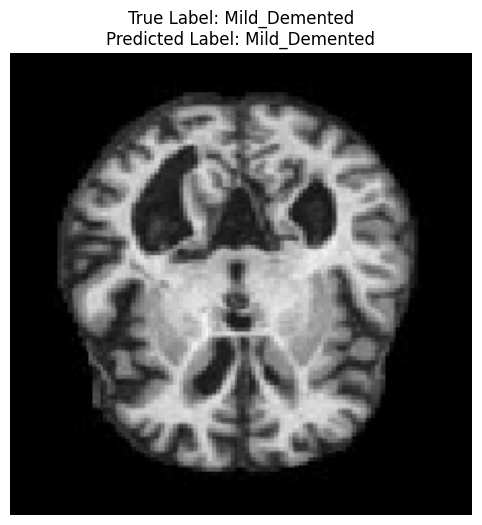

Image path: /content/data/test/Mild_Demented/mild_289.jpg
True label: Mild_Demented
Predicted label: Mild_Demented


In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/Alzhiemer_mobilenetmodel.h5')

# Load the class labels
class_labels = {value: key for key, value in train_generator.class_indices.items()}

# Ask the user to provide the image path
image_path = input("Enter the path to the image: ")

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make the prediction
prediction = model.predict(x)

# Convert the prediction to a class label
predicted_class = class_labels[np.argmax(prediction)]

# Get the true label from the image path
true_label = image_path.split('/')[-2]  # Assuming the true label is the name of the folder containing the image

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Display the image
ax.imshow(img)
ax.axis('off')
ax.set_title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")

# Show the figure
plt.show()

# Print the image path, true label, and predicted label
print(f"Image path: {image_path}")
print(f"True label: {true_label}")
print(f"Predicted label: {predicted_class}")

Enter the path to the image: /content/data/test/Non_Demented/non_1061.jpg
1/1 [==============================] - 0s 328ms/step


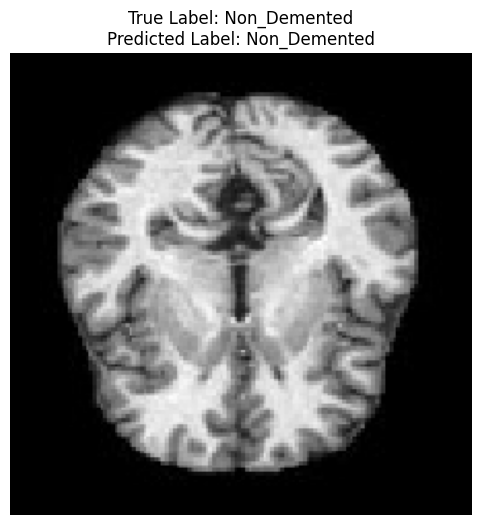

Image path: /content/data/test/Non_Demented/non_1061.jpg
True label: Non_Demented
Predicted label: Non_Demented


In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/Alzhiemer_mobilenetmodel.h5')

# Load the class labels
class_labels = {value: key for key, value in train_generator.class_indices.items()}

# Ask the user to provide the image path
image_path = input("Enter the path to the image: ")

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make the prediction
prediction = model.predict(x)

# Convert the prediction to a class label
predicted_class = class_labels[np.argmax(prediction)]

# Get the true label from the image path
true_label = image_path.split('/')[-2]  # Assuming the true label is the name of the folder containing the image

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Display the image
ax.imshow(img)
ax.axis('off')
ax.set_title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")

# Show the figure
plt.show()

# Print the image path, true label, and predicted label
print(f"Image path: {image_path}")
print(f"True label: {true_label}")
print(f"Predicted label: {predicted_class}")

In [ ]:
import os
from collections import Counter
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Define the paths to your data folders
train_path = '/content/data/train'
valid_path = '/content/data/valid'
test_path = '/content/data/test'

# Define the image dimensions and batch size
img_width, img_height =224,224
batch_size = 32

# Data augmentation parameters
data_gen_args = dict(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(**data_gen_args, rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train, valid, and test data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Get the class labels and number of classes
class_labels = train_generator.class_indices
num_classes = len(class_labels)

# Print class distribution in the train, valid, and test sets
print("Train set class distribution:", Counter(train_generator.classes))
print("Valid set class distribution:", Counter(valid_generator.classes))
print("Test set class distribution:", Counter(test_generator.classes))

Found 3839 images belonging to 4 classes.
Found 2242 images belonging to 4 classes.
Found 319 images belonging to 4 classes.
Train set class distribution: Counter({2: 1920, 3: 1344, 0: 537, 1: 38})
Valid set class distribution: Counter({2: 1120, 3: 784, 0: 315, 1: 23})
Test set class distribution: Counter({2: 160, 3: 112, 0: 44, 1: 3})


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

def vgg19(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Dense layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    vgg19model = Model(inputs=input_layer, outputs=output_layer)
    return vgg19model

# Example usage:
input_shape = (224, 224, 3)  # Example input shape, adjust according to your needs
num_classes = 4  # Example number of classes, adjust according to your needs

vgg19model = vgg19(input_shape, num_classes)
vgg19model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_29 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_30 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_32 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import os

# Define the paths to your data folders
train_path = '/content/data/train'
valid_path = '/content/data/valid'
test_path = '/content/data/test'

# Define the hyperparameters
batch_size = 16
epochs =30
learning_rate = 0.01
momentum = 0.9

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)

# Compile the model
vgg19model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train, valid, and test data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

checkpoint = ModelCheckpoint('Alzhiemer_vgg19model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', save_freq='epoch')
# Train the model
vgg19model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Load the best model
vgg19model.save('Alzhiemer_vgg19model.h5')

# Evaluate on the test set
test_loss, test_accuracy = vgg19model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Found 3839 images belonging to 4 classes.
Found 2242 images belonging to 4 classes.
Found 319 images belonging to 4 classes.
Epoch 1/30
239/239 [==============================] - ETA: 0s - loss: 1.0622 - accuracy: 0.4912
Epoch 1: val_accuracy improved from -inf to 0.49955, saving model to Alzhiemer_vgg19model.h5
239/239 [==============================] - 152s 409ms/step - loss: 1.0622 - accuracy: 0.4912 - val_loss: 1.0497 - val_accuracy: 0.4996
Epoch 2/30
239/239 [==============================] - ETA: 0s - loss: 1.0435 - accuracy: 0.4996
Epoch 2: val_accuracy did not improve from 0.49955
239/239 [==============================] - 86s 358ms/step - loss: 1.0435 - accuracy: 0.4996 - val_loss: 1.0384 - val_accuracy: 0.4991
Epoch 3/30
239/239 [==============================] - ETA: 0s - loss: 1.0390 - accuracy: 0.5001
Epoch 3: val_accuracy did not improve from 0.49955
239/239 [==============================] - 77s 324ms/step - loss: 1.0390 - accuracy: 0.5001 - val_loss: 1.0404 - val_accura

KeyboardInterrupt: 